In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {
    'grid.linestyle': '--'
 })
import re
import numpy as np
from scipy.interpolate import make_interp_spline

In [17]:
file1 = open(r'/home/kaien125/experiments/code/ufonet_experiment/saved/food_256_4class/07-18_18-22/log.txt', 'r')
Lines = file1.readlines()

# i = 0
# for line in Lines:
#     i += 1
#     print(line)

EVAL (5) | Loss: 0.418, PixelAcc: 0.86, Mean IoU: 0.36 |

"{'Pixel_Accuracy': 0.865, 'Mean_IoU': 0.361, 'Class_IoU': {0: 0.866, 1: 0.577, 2: 0.0, 3: 0.0}}"

EVAL (10) | Loss: 0.404, PixelAcc: 0.86, Mean IoU: 0.40 |

"{'Pixel_Accuracy': 0.861, 'Mean_IoU': 0.396, 'Class_IoU': {0: 0.877, 1: 0.596, 2: 0.0, 3: 0.11}}"

EVAL (15) | Loss: 0.448, PixelAcc: 0.85, Mean IoU: 0.34 |

"{'Pixel_Accuracy': 0.848, 'Mean_IoU': 0.341, 'Class_IoU': {0: 0.849, 1: 0.428, 2: 0.0, 3: 0.085}}"

EVAL (20) | Loss: 0.464, PixelAcc: 0.84, Mean IoU: 0.33 |

"{'Pixel_Accuracy': 0.844, 'Mean_IoU': 0.333, 'Class_IoU': {0: 0.848, 1: 0.403, 2: 0.0, 3: 0.08}}"

EVAL (25) | Loss: 0.427, PixelAcc: 0.86, Mean IoU: 0.40 |

"{'Pixel_Accuracy': 0.857, 'Mean_IoU': 0.401, 'Class_IoU': {0: 0.869, 1: 0.514, 2: 0.082, 3: 0.14}}"

EVAL (30) | Loss: 0.489, PixelAcc: 0.85, Mean IoU: 0.41 |

"{'Pixel_Accuracy': 0.847, 'Mean_IoU': 0.408, 'Class_IoU': {0: 0.866, 1: 0.476, 2: 0.174, 3: 0.114}}"

EVAL (35) | Loss: 0.497, PixelAcc: 0.84, M

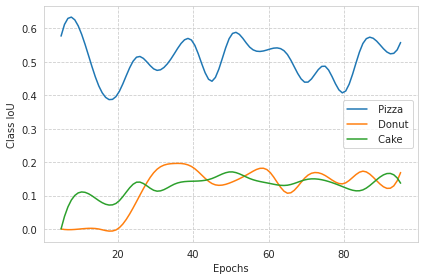

In [72]:
class1_start = " 1:"
class1_end = ", 2: "
class2_start = " 2:"
class2_end = ", 3: "
class3_start = " 3:"
class3_end = "}}"

class1Iou = []
class2Iou = []
class3Iou = []

i = 0
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class1_start)
        idx2 = line.index(class1_end)
        class1 = ''
        # getting elements in between
        for idx in range(idx1 + len(class1_start) + 1, idx2):
            class1 = class1 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class1Iou.append(class1)
class1Iou = np.array(list(map(float, class1Iou)))
    
i = 0
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class2_start)
        idx2 = line.index(class2_end)
        class2 = ''
        # getting elements in between
        for idx in range(idx1 + len(class2_start) + 1, idx2):
            class2 = class2 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class2Iou.append(class2)
class2Iou = np.array(list(map(float, class2Iou)))    

i = 0
x = []
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class3_start)
        idx2 = line.index(class3_end)
        class3 = ''
        # getting elements in between
        for idx in range(idx1 + len(class3_start) + 1, idx2):
            class3 = class3 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class3Iou.append(class3)
        x.append(i/2*5)
class3Iou = np.array(list(map(float, class3Iou)))

x = np.array(list(map(int, x)))

 
# Returns evenly spaced numbers
# over a specified interval.


labels = ['Pizza', 'Donut', 'Cake']
for iou,label in zip(y, labels):
    iou = np.array(iou)
    X_Y_Spline = make_interp_spline(x, iou)
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    
    timefilteredForce = plt.plot(X_,Y_,label = ' %s'%label)
    timefilteredForce = plt.xlabel('Epochs')
    timefilteredForce = plt.ylabel('Class IoU')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
print(x)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


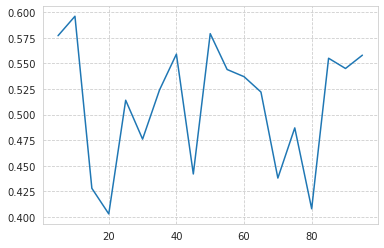

In [52]:
class1Iou = list(map(float, class1Iou))
plt.plot(x, class1Iou)
plt.show()

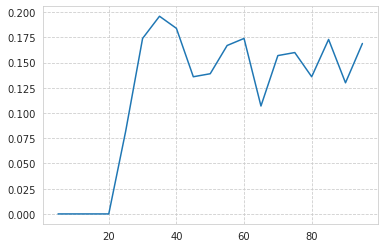

In [53]:
class2Iou = list(map(float, class2Iou))
plt.plot(x, class2Iou)
plt.show()

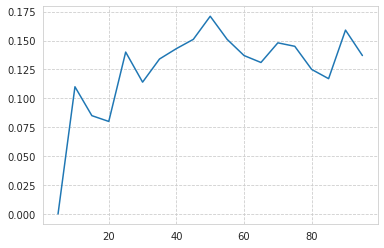

In [54]:
class3Iou = list(map(float, class3Iou))
plt.plot(x, class3Iou)
plt.show()

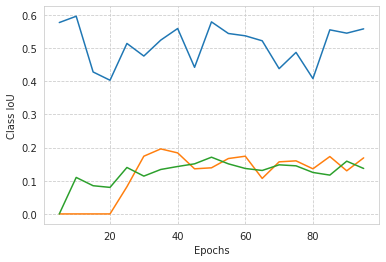

In [58]:
for iou in y:
    timefilteredForce = plt.plot(x,iou)
    timefilteredForce = plt.xlabel('Epochs')
    timefilteredForce = plt.ylabel('Class IoU')

plt.show()

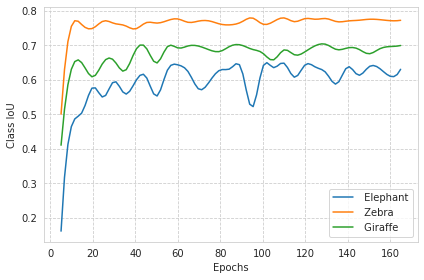

In [81]:
labels = ['Elephant','Zebra','Giraffe' ]
file1 = open(r'/home/kaien125/experiments/code/ufonet_experiment/logs_iou/wildlife_256_log.txt', 'r')
Lines = file1.readlines()

class1_start = " 1:"
class1_end = ", 2: "
class2_start = " 2:"
class2_end = ", 3: "
class3_start = " 3:"
class3_end = "}}"

class1Iou = []
class2Iou = []
class3Iou = []

i = 0
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class1_start)
        idx2 = line.index(class1_end)
        class1 = ''
        # getting elements in between
        for idx in range(idx1 + len(class1_start) + 1, idx2):
            class1 = class1 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class1Iou.append(class1)
class1Iou = np.array(list(map(float, class1Iou)))
    
i = 0
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class2_start)
        idx2 = line.index(class2_end)
        class2 = ''
        # getting elements in between
        for idx in range(idx1 + len(class2_start) + 1, idx2):
            class2 = class2 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class2Iou.append(class2)
class2Iou = np.array(list(map(float, class2Iou)))    

i = 0
x = []
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class3_start)
        idx2 = line.index(class3_end)
        class3 = ''
        # getting elements in between
        for idx in range(idx1 + len(class3_start) + 1, idx2):
            class3 = class3 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class3Iou.append(class3)
        x.append(i/2*5)
class3Iou = np.array(list(map(float, class3Iou)))

x = np.array(list(map(int, x)))
y = [class1Iou,class2Iou,class3Iou]
 
# Returns evenly spaced numbers
# over a specified interval.



for iou,label in zip(y, labels):
    iou = np.array(iou)
    X_Y_Spline = make_interp_spline(x, iou)
    X_ = np.linspace(x.min(), x.max(), 100)
    Y_ = X_Y_Spline(X_)
    
    timefilteredForce = plt.plot(X_,Y_,label = ' %s'%label)
    timefilteredForce = plt.xlabel('Epochs')
    timefilteredForce = plt.ylabel('Class IoU')
plt.legend()
plt.tight_layout()
plt.savefig('logs_iou/wildlife_iou_epoch.pdf')

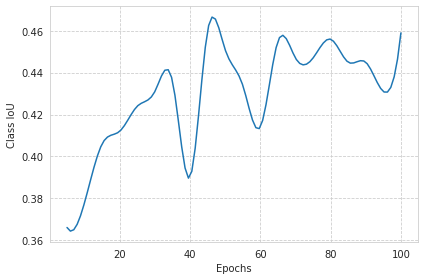

In [91]:

file1 = open(r'/home/kaien125/experiments/code/ufonet_experiment/logs_iou/vehicle_128_binary.txt', 'r')
Lines = file1.readlines()
# i = 0
# for line in Lines:
#     i += 1
#     print(line)
class1_start = " 1:"
class1_end = "}}"


class1Iou = []


i = 0
x = []
for line in Lines:
    i += 1
    if (i%2 == 0):
        idx1 = line.index(class1_start)
        idx2 = line.index(class1_end)
        class1 = ''
        # getting elements in between
        for idx in range(idx1 + len(class1_start) + 1, idx2):
            class1 = class1 + line[idx]
#             res = re.split(': |, |\*|\n',res)
#         print(len(class1))
        class1Iou.append(class1)
        x.append(i/2*5)
class1Iou = np.array(list(map(float, class1Iou)))
    
x = np.array(list(map(int, x)))

 
# Returns evenly spaced numbers
# over a specified interval.




iou = np.array(class1Iou)
X_Y_Spline = make_interp_spline(x, iou)
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)
    
timefilteredForce = plt.plot(X_,Y_)
timefilteredForce = plt.xlabel('Epochs')
timefilteredForce = plt.ylabel('Class IoU')

plt.tight_layout()
plt.savefig('logs_iou/vehicle_iou_epoch_binary.pdf')